In [1]:
import os
import shutil
import urllib3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
pd.set_option('display.max_columns', 500)

Based on: machine-learning/examples/bbengfort/traffic/Traffic.ipynb

Pulled data for one building and modeled electricity usage

#DATA LOADING

In [2]:
data = pd.read_csv("0008_0806.csv",
    index_col="DATE_TIME",
    parse_dates=True
)
data.head(24)

,DCREALPROPERTYID,YEARBUILT,EKBTUPERSQFT,NKBTUPERSQFT,WARD1,WARD2,WARD3,WARD4,WARD5,WARD6,WARD7,WARD8,BNK,EDU,ENT,FSV,FSL,HEA,RES,IND,MIX,OFF,OTH,PAR,PBL,REL,RET,SVC,TCH,UTL,STR,AWND,CLDD,HTDD,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE_TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0008_0806,1965,1.731791,0.093711,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.8,0,906,1.2,35.8,44.7,26.8,300,310,36.0,49
2018-02-01,0008_0806,1965,1.548074,0.080550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8.7,4,554,0.2,45.3,53.6,37.1,290,290,30.0,39
2018-03-01,0008_0806,1965,1.665465,0.082635,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.6,0,663,4.5,43.6,51.9,35.3,320,300,47.0,62
2018-04-01,0008_0806,1965,1.581336,0.070313,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10.7,17,319,0.0,54.9,64.7,45.2,320,320,35.1,46
2018-05-01,0008_0806,1965,1.686283,0.067732,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8.1,232,2,0.0,72.4,81.4,63.4,250,260,33.1,42
2018-06-01,0008_0806,1965,1.720542,0.061364,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.6,336,1,0.0,76.2,84.5,67.8,60,70,25.9,32
2018-07-01,0008_0806,1965,1.840393,0.064332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.6,486,0,0.0,80.7,88.5,72.8,310,300,36.0,42
2018-08-01,0008_0806,1965,1.822741,0.066071,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.2,496,0,0.0,81.0,88.8,73.2,270,260,38.9,51
2018-09-01,0008_0806,1965,1.731256,0.064951,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8.1,316,2,0.0,75.5,81.8,69.1,50,190,25.1,34


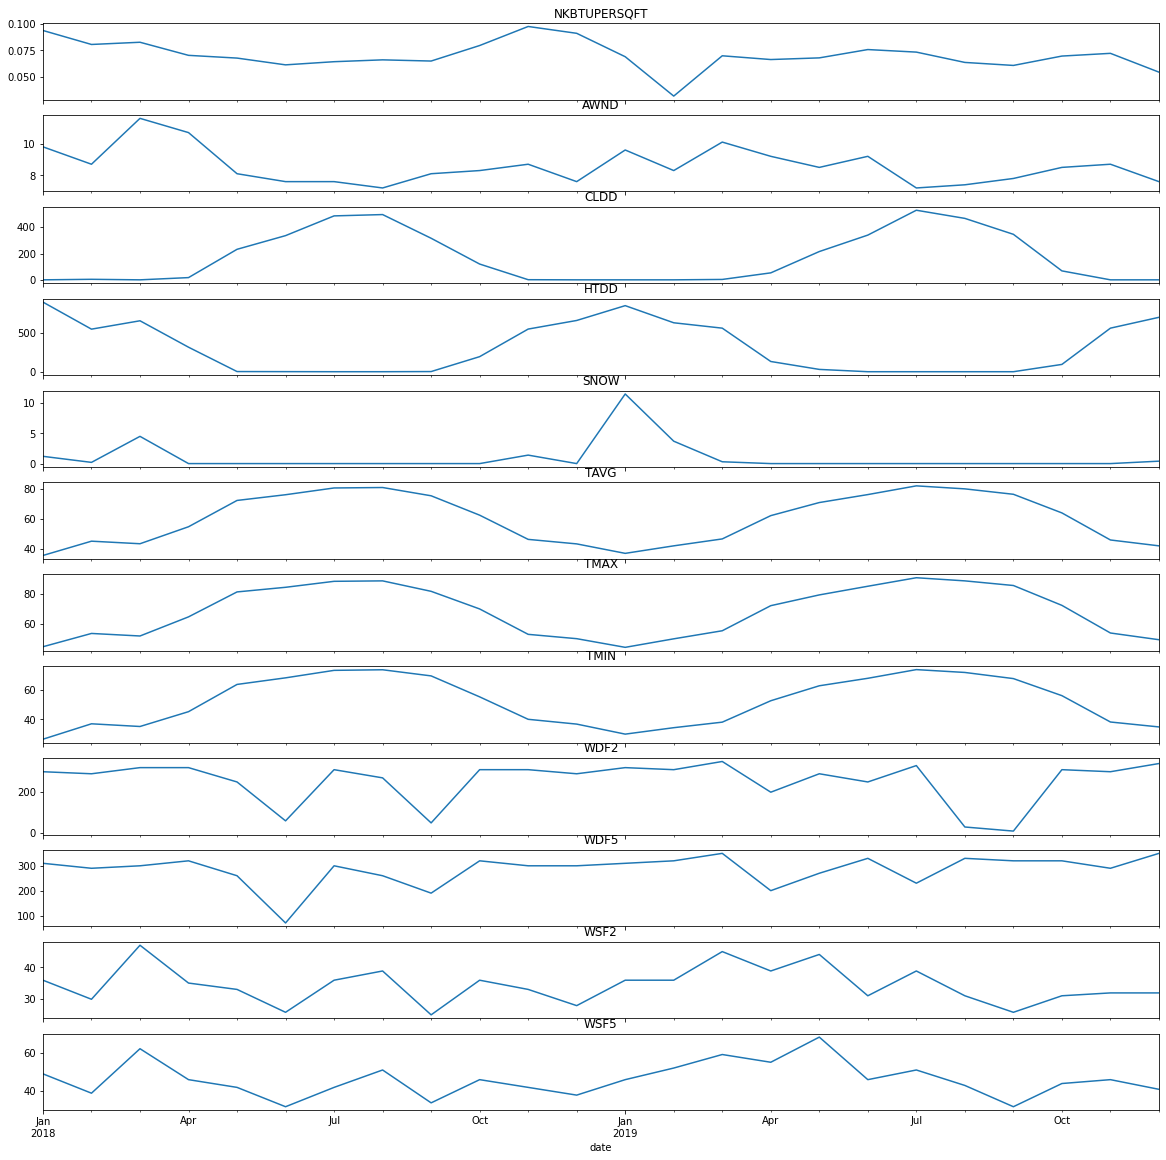

In [3]:
def plot_numeric_features(df=data, cols=["NKBTUPERSQFT", "AWND", "CLDD", "HTDD", "SNOW", "TAVG", "TMAX", "TMIN", "WDF2", "WDF5", "WSF2", "WSF5"]):

    #"YEARBUILT", "AWND", "CLDD", "HTDD", "SNOW", "TAVG", "TMAX", "TMIN", "WDF2", "WDF5", "WSF2", "WSF5", "KBTUPERSQFT"
    fig, axes = plt.subplots(nrows=len(cols), sharex=True, figsize=(20,20))
    
    for col, ax in zip(cols, axes) :
        df[col].plot(ax=ax)
        ax.set_title(col)
        
        if ax == axes[-1]:
            ax.set_xlabel("date")
            
#    fig.tight_layout()
    return ax

# Plot features in date range
_ = plot_numeric_features(data.loc["2018-01-01":"2019-12-01"])

In [4]:
#def plot_categorical_features(df=data, cols=['WARD2','RES']):
#    fig, axes = plt.subplots(nrows=len(cols), sharex=True, figsize=(9,18))
    
#    for col, ax in zip(cols, axes):
#        sns.barplot(x='KBTUPERSQFT', y=col, data=df, ax=ax)
#        ax.set_title(col)
        
#        if ax == axes[-1]:
#            ax.set_xlabel('KBTUPERSQFT')
    
    
#    fig.tight_layout()
#    return ax


#_ = plot_categorical_features(df)

In [5]:
from sklearn.model_selection import train_test_split as tts


TARGET = "EKBTUPERSQFT"
COLS = ["NKBTUPERSQFT","DATE_TIME","YEARBUILT", "CLDD", "HTDD", "SNOW","WDF2", "WSF2"]


def make_sklearn_data(df=data, splits=True, train_size=0.8, target=TARGET, cols=COLS):
    # Add the datetime column back to the main dataframe
    df = df.reset_index()
    X, y = df[cols], df[target]
    
    if splits:
        return tts(X, y, train_size=train_size)
    return X, y

<AxesSubplot:xlabel='DATE_TIME_cos', ylabel='DATE_TIME_sin'>

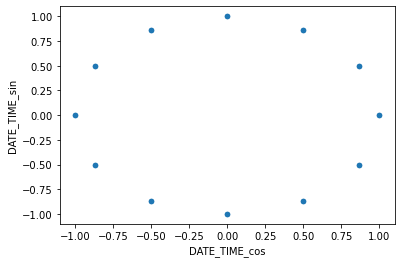

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin


class CyclicEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, date_extract="month"):
        if date_extract not in {"minute", "hour", "week", "month", "year"}:
            raise ValueError(f"specify correct date component to extract, not {date_extract}")
        self.date_extract = date_extract
    
    def get_date_component(self, x):
        if self.date_extract == "month":
            return x.dt.month
        elif self.date_extract == "year":
            return x.dt.year
        else:
            raise NotImplementedError(f"{self.date_extract} date component not implemented yet")
            
    def fit(self, X, y=None):
        self.cycle_max_ = self.get_date_component(X).max()
        return self

    def transform(self, X,  y=None):
        cols = []
        names = []
        x = self.get_date_component(X)
        xn = 2 * np.pi * x / self.cycle_max_
        cols.append(np.cos(xn))
        names.append(f"{X.name}_cos")
        cols.append(np.sin(xn))
        names.append(f"{X.name}_sin")
        return pd.DataFrame(np.asarray(cols).T, columns=names)

    
ce = CyclicEncoder().fit_transform(data.reset_index()["DATE_TIME"])
ce.plot(x="DATE_TIME_cos", y="DATE_TIME_sin", kind="scatter")

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder

extraction = [('column_selection', ColumnTransformer([('time_components', FeatureUnion([('month', CyclicEncoder(date_extract="month")),('year', CyclicEncoder(date_extract="year")),]), 'DATE_TIME'),], remainder="passthrough")),]


X, y = make_sklearn_data(splits=False)
Pipeline(extraction).fit_transform(X).shape

(24, 11)

In [8]:
from sklearn.ensemble import RandomForestRegressor 


X_train, X_test, y_train, y_test = make_sklearn_data()

extraction.append(("clf", RandomForestRegressor()))
model = Pipeline(extraction)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933687892409876

Based on: demos/20201031.ipynb
Regression on KBTU for the numeric columns

In [9]:
data.shape

(24, 42)

In [11]:
cols=["NKBTUPERSQFT", "AWND", "CLDD", "HTDD", "SNOW", "TAVG", "WDF2", "WDF5", "WSF2", "WSF5"]

X = data[cols]
y = data["EKBTUPERSQFT"]

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [13]:
def describe_model(model):
    print(model.get_params())
    print()
    
    for attr in dir(model):
        if attr.endswith("_") and not attr.startswith("_"):
            print(f"{attr} {getattr(model, attr)}")

            
describe_model(model)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

coef_ [ 1.52119643e+00 -4.58305101e-03 -7.32806073e-04  1.44137542e-03
  4.14781770e-03  4.07441627e-02  4.87882845e-05  3.53792783e-05
  2.39879400e-03 -1.04110211e-03]
intercept_ -1.2368338052020444
n_features_in_ 10
rank_ 10
singular_ [1.78937298e+03 4.80613334e+02 4.28270560e+02 2.48280864e+02
 4.13098006e+01 9.82969177e+00 7.20534892e+00 3.37408345e+00
 2.53205475e+00 5.01541378e-02]


In [14]:
from sklearn.model_selection import train_test_split as tts 


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)

In [15]:
lrm = LinearRegression(normalize=True).fit(X_train, y_train)
lrm.score(X_test, y_test)

0.27711777887059874

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor(n_estimators=10, max_depth=3).fit(X_train, y_train)
describe_model(rfm)
rfm.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

base_estimator_ DecisionTreeRegressor()
estimators_ [DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=304369059), DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1692137987), DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1461427179), DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2008171853), DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1036859819), DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=447914895), DecisionTreeRegressor(max_depth=3, max_features='auto', random

0.6406438287924325